1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

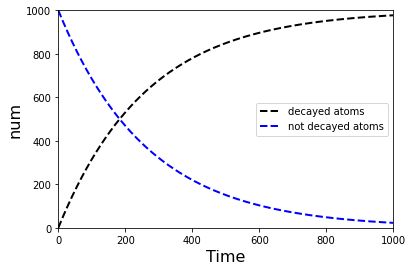

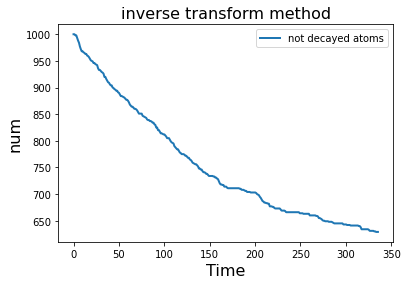

In [4]:
# 11ex - 1

import numpy as np
import matplotlib.pyplot as plt
import math

tau=3.052*60
N=1000

def dec(x):
    return (1-2**(-x/tau))

x=np.linspace(0, 1000, 1000)

plt.plot(x, N*dec(x), linewidth=2,color='k', label='decayed atoms', linestyle = '--')
plt.plot(x, N*(1-dec(x)), linewidth=2, color='b',label='not decayed atoms',  linestyle = '--')
plt.xlabel('Time', size=16)
plt.ylabel('num',size=16)
plt.axis([0, 1000, 0, 1000])
plt.legend()
plt.show()

# monte carlo method


# Definition of the inverse cumulative distribution function.
def icdf(z,tau):
    t = np.zeros(len(z))
    for i in range(len(z)):
        t[i] = -tau*math.log((1-z[i]),2)
    return t
u = np.random.random(1000)
v = np.sort(icdf(u, tau)) # apply the inverse of the CDF

time = np.linspace(0,1000,1000)  # time 
counts = np.zeros(1000)              
index = 0

for j in range(1000):
    if v[j] < time[index]:
        counts[index] += 1
    else:
        index += 1

total = np.sum(counts)
q = 0
decayed_T = []
while(np.sum(counts[:q])<total):
    decayed_T.append(np.sum(counts[:q]))
    q += 1

decayed = np.asarray(decayed_T) 
not_decayed = (1000-decayed)           

plt.plot(time[:q],not_decayed, linewidth=2, label='not decayed atoms')
plt.xlabel('Time', size=16)
plt.ylabel('num',size=16)
plt.title('inverse transform method',size=16)
plt.legend()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

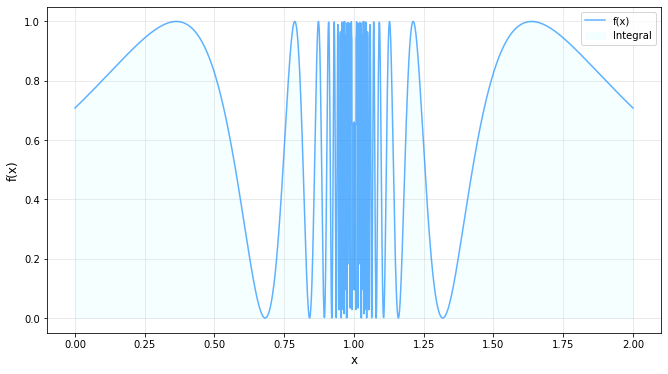

In [23]:
# 11ex - 2

def f(x):
    return pow((np.sin(1/(1-x))), 2)

# plot f(x)
N=2000
x=np.linspace(1e-6, 2-1e-6, N)
fig, ax=plt.subplots(figsize=(11, 6))
ax.plot(x, f(x), label='f(x)', color='dodgerblue', alpha=0.7)
ax.fill_between(x, f(x), where=[(x > 0)and(x < 2)for x in x], color='lightcyan', alpha=0.3, label='Integral')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('f(x)', fontsize=12)
ax.set_xlim(-0.1,2.1)
ax.legend(loc='best')
ax.grid(alpha=0.3)



In [28]:
N, rep =2000, 200
integral_hm=[]

for i in range(rep): 
    count=0
    for j in range(N):
        x_1=2*np.random.random() 
        y=np.random.random()
        if y<f(x_1):
            count+=1
    integral_hm.append(2*count/N)

mean=np.mean(integral_hm)
err=np.std(integral_hm)/np.sqrt(rep)

print('hit/miss method')
print('%d times integral (over N=%d) and the computed value is:' %(N, rep))
print('I=%.4f ± %.4f' %(mean, err))
print("\n")

integral_mv=2*np.sum(f(x))/N  #V=b-a=2
err=2*np.sqrt((np.sum(f(x)**2)/N-np.sum(f(x)/N)**2)/N)

print('mean value method')
print('computed integral:')
print('I=%.4f ± %.4f' % (integral_mv, err))

hit/miss method
2000 times integral (over N=200) and the computed value is:
I=1.3456 ± 0.0015


mean value method
computed integral:
I=1.3504 ± 0.0146


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [34]:
# 11ex - 3

n = 1000

# 2D
count = 0   
for i in range(n):
    x = 2 * np.random.random() - 1 #-1 to 1
    y = 2 * np.random.random() - 1    
    if(x**2 + y**2 <= 1): count += 1
        
I = 4 * count / n # 4 -> area of the box
print("2D integral is:", I)        

# 10D  
count = 0   
for i in range(n):
    x = 2 * np.random.rand(10) - 1
    r = (x**2).sum()
    
    if(r <= 1): count += 1
        
I10 = (2**10) * count / n # 2**10 -> V
print("10D integral is:", I10)

2D integral is: 3.072
10D integral is: 5.12


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [35]:
# 11ex - 4

def w(x):
    return 1/np.sqrt(x)

def f(x):
    return (x**(-1/2))/(np.exp(x) + 1)

N=10000

x = np.random.random(N)**2
I = 1 / N * np.sum(f(x)/w(x)) * 2
print("Integral :", I)

Integral : 0.8411321750640876
